# Comparison of Sampling Techniques in Credit Card Fraud Detection

**Note:** I'm a newbie to kaggle. Any suggestions about the notebook is most welcome!!

The main purpose of the notebook is to learn sampling techniques to handle imbalanced dataset. Many beginners have never sampled data of imbalanced dataset and got an accuracy of 98% or more (considering only accuracy as performance metric) and think it's perfect. But many fail to notice the False Positive rates they got as their result. In this notebook, we discuss about 

i)   Random Under Sampling.

ii)  Near Miss Under Sampling.

iii) Tomek Links Under Sampling.

iv)  Cluster Centroids Under Sampling.

v)  Random Over Sampling.

vi)   SMOTE. (Synthetic Minority OverSampling Technique)

vii)  ADASYN. (Adaptive Synthetic Over Sampling)

viii) SMOTE & Tomek Links. (Combination of Under sampling and Over sampling)


A comparison of these sampling techniques and it's explanation using Credit Card Fraud Detection.


Comparison along with building Random Forest Models for all the sampled data discussed above using GridsearchCV for hyperparameter optimization.

In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


Importing the dataset into Pandas Dataframe.

In [87]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
print(df.head(10))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are 31 features in the dataset. Except amount and time, all the others features are scaled using PCA (given in the dataset description).Checking for any missing values in the dataset for imputation.

There are no missing values in the dataset. There's no need for imputation. Next, we will explore the Class (Fraud or Not Fraud).

In [89]:
Non_fraud = df[df['Class']==0]['Class'].count()
Fraud = df[df['Class']==1]['Class'].count()
Fraud_percent = Fraud/(Fraud+Non_fraud)
Non_Fraud_percent = Non_fraud/(Fraud+Non_fraud)
print('Total Number of Non-Fraud Transactions:',Non_fraud)
print('Total Number of Fraud Transcations:',Fraud)
print('Percentage of Non-Fraud Transactions:',Non_Fraud_percent*100,'%')
print('Percentage of Fraud Transactions:',Fraud_percent*100,'%')

Total Number of Non-Fraud Transactions: 284315
Total Number of Fraud Transcations: 492
Percentage of Non-Fraud Transactions: 99.82725143693798 %
Percentage of Fraud Transactions: 0.1727485630620034 %


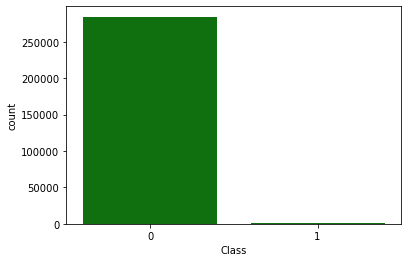

In [90]:
import seaborn as sns

sns.countplot(df['Class'],data=df,color='green')

One of the major issues that novice users fall into when dealing with imbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

Even a classifier with 99.83% accuracy,will wrongly classify the remaining 0.17% fraud transaction as Non-fraud Transaction simply because the model is trained with Non-fraud transactions than Fraud Transactions (High bias in the Class). So it's very crucial to classify Fraud transactions correctly. 

Let's analyse the data before building the model.

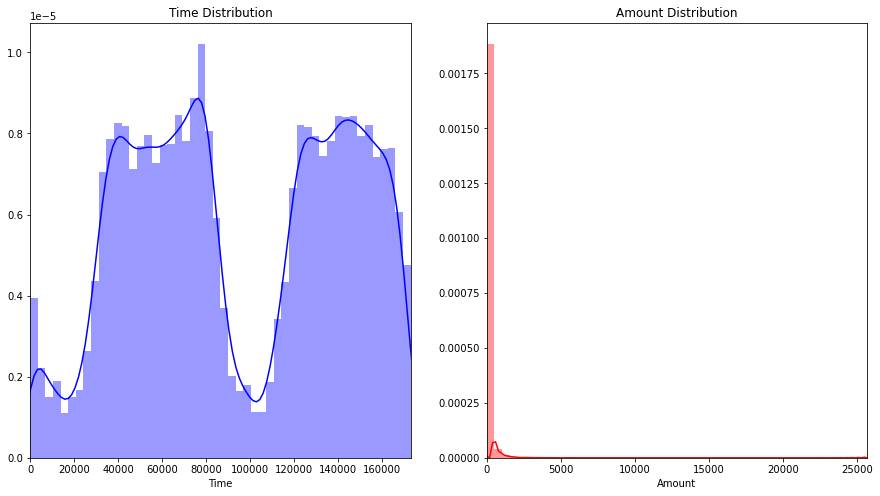

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))

plt.subplot(1,2,1)

sns.distplot(df['Time'],color='blue')
plt.title('Time Distribution')
plt.xlim([min(df['Time']),max(df['Time'])])

plt.subplot(1,2,2)

sns.distplot(df['Amount'],color='red')
plt.title('Amount Distribution')
plt.xlim([min(df['Amount']),max(df['Amount'])])

plt.show()

The time and Amount is not normally distributed. So before any analysis, we have to scale the data and transform. Scaling/Transformation is only done prior to model building (before trail and error) to avoid errors while trying out Distance based algorithms.

In [37]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()

df['Scaled_Time'] = scal.fit_transform(df['Time'].values.reshape(-1,1))
df['Scaled_Amount'] = scal.fit_transform(df['Amount'].values.reshape(-1,1))

df.drop(['Time','Amount'],axis=1,inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Time,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403


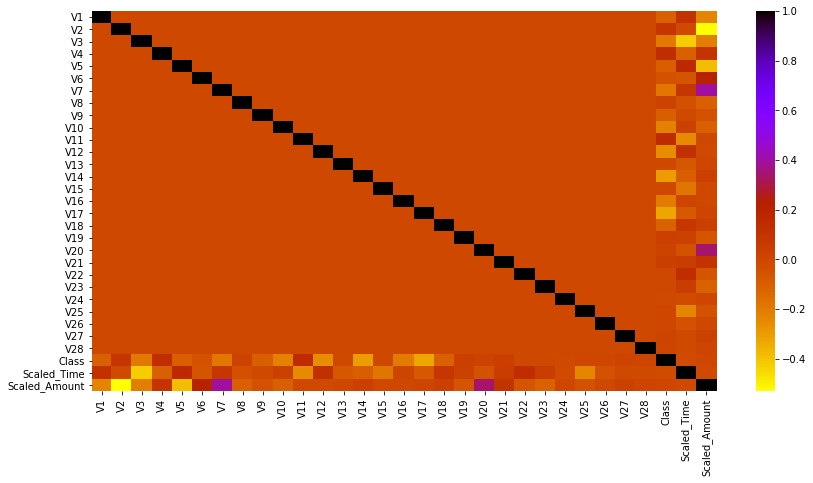

In [38]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),cmap='gnuplot_r')

In [39]:
print(df.corr()['Class'].sort_values(ascending = False))

Class            1.000000
V11              0.154876
V4               0.133447
V2               0.091289
V21              0.040413
V19              0.034783
V20              0.020090
V8               0.019875
V27              0.017580
V28              0.009536
Scaled_Amount    0.005632
V26              0.004455
V25              0.003308
V22              0.000805
V23             -0.002685
V15             -0.004223
V13             -0.004570
V24             -0.007221
Scaled_Time     -0.012323
V6              -0.043643
V5              -0.094974
V9              -0.097733
V1              -0.101347
V18             -0.111485
V7              -0.187257
V3              -0.192961
V16             -0.196539
V10             -0.216883
V12             -0.260593
V14             -0.302544
V17             -0.326481
Name: Class, dtype: float64


We can see from the heatmap, that there is no solid evidence of features with high correlations. We drop the features with less correlations i.e) close to zero from either side. We will consider only highly correlated features both on the positive as well as negative side.

In [40]:
X = df.drop(['Class','V4','V2','V21','V19','V20','V8','V27','V28','Scaled_Amount','V26','V25','V22','V23','V15','V13','V24','Scaled_Time','V6','V5','V9','V1','V18'],axis=1)
y = df['Class']

**Note:** Here I dropped Scaled_Amount and Scaled_Time after scaling time and amount which may seem useless, but scaling is done prior to analysis. If these features have a significant correlation, then these features would have been included in the model (require scaling before including in the model).

In [41]:
print(X.head())
print(y.head())

         V3        V7       V10       V11       V12       V14       V16  \
0  2.536347  0.239599  0.090794 -0.551600 -0.617801 -0.311169 -0.470401   
1  0.166480 -0.078803 -0.166974  1.612727  1.065235 -0.143772  0.463917   
2  1.773209  0.791461  0.207643  0.624501  0.066084 -0.165946 -2.890083   
3  1.792993  0.237609 -0.054952 -0.226487  0.178228 -0.287924 -1.059647   
4  1.548718  0.592941  0.753074 -0.822843  0.538196 -1.119670 -0.451449   

        V17  
0  0.207971  
1 -0.114805  
2  1.109969  
3 -0.684093  
4 -0.237033  
0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


# Random Under Sampling Non-Fraud Transactions (Majority Class)


![](https://miro.medium.com/max/2246/1*gHW_PLz7kWrhdl5t1sJRRA.png)

Undersampling gets the ratio of classes equal, by limiting the number of majority classes. This process of choosing the majority class samples into resampled data is done randomly. Thus we get 50-50 ratio of classes, avoiding the bias in the results. To learn more about undersampling you can visit the link below.

[http://imbalanced-learn.readthedocs.io/en/stable/under_sampling.html](http://imbalanced-learn.readthedocs.io/en/stable/under_sampling.html)

In [42]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0,replacement =True)
rus.fit(X,y)
X_under_sampled,y_under_sampled = rus.fit_resample(X,y)

In [43]:
print("No. of Non-Fraud Transactions in under sampled data: ",y_under_sampled[y_under_sampled==0].value_counts())
print("No. of Fraud Transactions in under sampled data: ",y_under_sampled[y_under_sampled==1].value_counts())

No. of Non-Fraud Transactions in under sampled data:  0    492
Name: Class, dtype: int64
No. of Fraud Transactions in under sampled data:  1    492
Name: Class, dtype: int64


There are only 984 entries in the under sampled data with equal proportion (492 entries of both the classes). So, undersampling helps to overcome the bias of the dataset.

# Near Miss Under Sampling

![](https://miro.medium.com/max/875/1*8WM0gsh_naPEa9HTpE2c1A.png)

Near miss undersampling technique undersamples the majority class datapoints. The nearest majority class samples are sampled into dataset and eliminates the bias in the imbalanced dataset. Click the below link to dive deeper.

[https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.NearMiss.html#imblearn.under_sampling.NearMiss](http:imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.NearMiss.html#imblearn.under_sampling.NearMiss)

In [44]:
from imblearn.under_sampling import NearMiss

near = NearMiss(sampling_strategy="not minority")
near.fit(X,y)
X_near_sampled,y_near_sampled = near.fit_resample(X,y)

In [45]:
print("No. of Non-Fraud Transactions in under sampled data: ",y_near_sampled[y_near_sampled==0].value_counts())
print("No. of Fraud Transactions in under sampled data: ",y_near_sampled[y_near_sampled==1].value_counts())

No. of Non-Fraud Transactions in under sampled data:  0    492
Name: Class, dtype: int64
No. of Fraud Transactions in under sampled data:  1    492
Name: Class, dtype: int64


There are only 984 entries in the near miss under sampled data with equal proportion (492 entries of both the classes). So, near miss undersampling helps to overcome the bias of the dataset which is more efficient than random under sampling.

# Tomek Links Under Sampling

![](https://miro.medium.com/max/875/1*pR35KsLpz7-_zvbvdm0frg.png)

Tomek links are pairs of very close instances that belong to different classes. They’re samples near the borderline between classes. By removing the examples of the majority class of each pair, we increase the space between the two classes and move toward balancing the dataset by deleting those points.To know more about TomekLinks visit the link below.

[https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.TomekLinks.html#imblearn.under_sampling.TomekLinks](http://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.TomekLinks.html#imblearn.under_sampling.TomekLinks)

In [46]:
from imblearn.under_sampling import TomekLinks

tomek = TomekLinks(sampling_strategy='auto')
tomek.fit(X,y)
X_tomek_sampled,y_tomek_sampled = tomek.fit_resample(X,y)

In [47]:
print("No. of Non-Fraud Transactions in under sampled data: ",y_tomek_sampled[y_tomek_sampled==0].value_counts())
print("No. of Fraud Transactions in under sampled data: ",y_tomek_sampled[y_tomek_sampled==1].value_counts())

No. of Non-Fraud Transactions in under sampled data:  0    284276
Name: Class, dtype: int64
No. of Fraud Transactions in under sampled data:  1    492
Name: Class, dtype: int64


You can able to notice that the classes are still biased by a big margin. This sampling fails for largely biased data. But still using it as a case for comparison.

# Cluster Centroids Under Sampling

![](https://miro.medium.com/max/875/1*1XlHmnc9hKn1oPz48lrn7Q.png)

Cluster centroids is similar to K-means clustering, it uses clusters to under sample majority class data as shown in the figure. You can see the documentation in the link.

[https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.ClusterCentroids.html#imblearn.under_sampling.ClusterCentroids](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.ClusterCentroids.html#imblearn.under_sampling.ClusterCentroids)

In [48]:
from imblearn.under_sampling import ClusterCentroids

clusters = ClusterCentroids(sampling_strategy='auto',random_state = 1)
clusters.fit(X,y)
X_cluster_sampled,y_cluster_sampled = clusters.fit_resample(X,y)

In [49]:
print("No. of Non-Fraud Transactions in under sampled data: ",y_cluster_sampled[y_cluster_sampled==0].value_counts())
print("No. of Fraud Transactions in under sampled data: ",y_cluster_sampled[y_cluster_sampled==1].value_counts())

No. of Non-Fraud Transactions in under sampled data:  0    492
Name: Class, dtype: int64
No. of Fraud Transactions in under sampled data:  1    492
Name: Class, dtype: int64


There are only 984 entries after undersampling. Let's move to Over sampling techniques and understand the difference between Under sampling techniques and Over sampling techniques.

# Random Over Sampling Fraud Transactions (Minority Class)

![](https://miro.medium.com/max/2246/1*o_KfyMzF7LITK2DlYm_wHw.png)

In Over Sampling, we produce new data points of the minority class with replacement in the dataset. Thus we get 50-50 ratio of classes, avoiding the bias in the results. To learn more about oversampling you can visit the link below.

[https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html](https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html)

In [50]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
ros.fit(X,y)
X_over_sampled,y_over_sampled = ros.fit_resample(X,y)

In [51]:
print("No. of Non-Fraud Transactions in under sampled data: ",y_over_sampled[y_over_sampled==0].value_counts())
print("No. of Fraud Transactions in under sampled data: ",y_over_sampled[y_over_sampled==1].value_counts())

No. of Non-Fraud Transactions in under sampled data:  0    284315
Name: Class, dtype: int64
No. of Fraud Transactions in under sampled data:  1    284315
Name: Class, dtype: int64


There are double the number of entries in the oversampled data. Over sampling repeats minority class data points, hence avoids the bias in the data. (Equal Proportion but 284315 entries of both the classes) 

# SMOTE (Synthetic Minority OverSampling Technique)

**Note:** OverSampling repeats the original minority class data points to make the proportion of classes equal (increases sample size only by repetiton) whereas SMOTE generates new synthetic data points of minority class. 

![](http://miro.medium.com/max/2760/1*bSOwLuDleEEGiuw7PtooOQ.png)

In SMOTE, we generate synthetic data points which is similar to our under sampled data (Fraud Transactions in this case) to overcome the bias. Thus we get 50-50 ratio of classes, avoiding the bias in the results. To learn more about SMOTE you can visit the link below.

[https://imbalanced-learn.readthedocs.io/en/stable/combine.html](http://imbalanced-learn.readthedocs.io/en/stable/combine.html)

[https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE](http:imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE)

In [52]:
from imblearn.over_sampling import SMOTE

r_smote = SMOTE(random_state =0)
r_smote.fit(X,y)
X_smote,y_smote = r_smote.fit_resample(X,y)

In [53]:
print("No. of Non-Fraud Transactions in under sampled data: ",y_smote[y_smote==0].value_counts())
print("No. of Fraud Transactions in under sampled data: ",y_smote[y_smote==1].value_counts())

No. of Non-Fraud Transactions in under sampled data:  0    284315
Name: Class, dtype: int64
No. of Fraud Transactions in under sampled data:  1    284315
Name: Class, dtype: int64


There are double the number of entries in the SMOTE data. SMOTE generates synthetic minority class datapoints, hence avoids the bias in the data (equal Proportion but 284315 entries of both the classes is maintained).

# ADASYN (Adaptive Synthetic Sampling)

ADASYN generates samples of the minority class. But here, because of their density distributions, this technique receives wide attention. It's purpose is to generate data for minority class samples that are harder to learn, as compared to those minority samples that are easier to learn.

In [54]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state =0,sampling_strategy = 'auto')
adasyn.fit(X,y)
X_adasyn,y_adasyn = adasyn.fit_resample(X,y)

In [55]:
print("No. of Non-Fraud Transactions in under sampled data: ",y_adasyn[y_adasyn==0].value_counts())
print("No. of Fraud Transactions in under sampled data: ",y_adasyn[y_adasyn==1].value_counts())

No. of Non-Fraud Transactions in under sampled data:  0    284315
Name: Class, dtype: int64
No. of Fraud Transactions in under sampled data:  1    284304
Name: Class, dtype: int64


There are approximately equal proportion of data in both the classes,by oversampling the minority class.

[https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#imblearn.over_sampling.ADASYN](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#imblearn.over_sampling.ADASYN)

# SMOTE with Tomek Links (Combination of both Undersampling and Oversampling)

We can combine under sampling and over sampling techniques to improve our results. A combination of SMOTE and Tomek Links gives better results than individual sampling techniques.

In [56]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state =0,sampling_strategy = 'auto')
smote_tomek.fit(X,y)
X_smote_tomek,y_smote_tomek = smote_tomek.fit_resample(X,y)

In [57]:
print("No. of Non-Fraud Transactions in under sampled data: ",y_smote_tomek[y_smote_tomek==0].value_counts())
print("No. of Fraud Transactions in under sampled data: ",y_smote_tomek[y_smote_tomek==1].value_counts())

No. of Non-Fraud Transactions in under sampled data:  0    284315
Name: Class, dtype: int64
No. of Fraud Transactions in under sampled data:  1    284315
Name: Class, dtype: int64


To learn more about combination of undersampling and oversampling techniques, you can check imblearn.combine documentation for combination of sampling techniques.


[https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTETomek.html#imblearn.combine.SMOTETomek](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTETomek.html#imblearn.combine.SMOTETomek)

# Sampling results comparison
Now let's compare the results of these sampling techniques.
So, first splitting the data into training and testing set for the 8 different set of data samples.

First, splitting undersampling data.

In [58]:
from sklearn.model_selection import train_test_split

X_under_train,X_under_test,y_under_train,y_under_test = train_test_split(X_under_sampled,y_under_sampled,random_state=0,train_size=0.7)
X_near_train,X_near_test,y_near_train,y_near_test = train_test_split(X_near_sampled,y_near_sampled,random_state=0,train_size=0.7)
X_tomek_train,X_tomek_test,y_tomek_train,y_tomek_test = train_test_split(X_tomek_sampled,y_tomek_sampled,random_state=0,train_size=0.7)
X_cluster_train,X_cluster_test,y_cluster_train,y_cluster_test = train_test_split(X_cluster_sampled,y_cluster_sampled,random_state=0,train_size=0.7)


Splitting the oversampling data.

In [59]:
X_over_train,X_over_test,y_over_train,y_over_test = train_test_split(X_over_sampled,y_over_sampled,random_state=0,train_size=0.7)
X_SMOTE_train,X_SMOTE_test,y_SMOTE_train,y_SMOTE_test = train_test_split(X_smote,y_smote,random_state=0,train_size=0.7)
X_adasyn_train,X_adasyn_test,y_adasyn_train,y_adasyn_test = train_test_split(X_adasyn,y_adasyn,random_state=0,train_size=0.7)
X_SMOTETomek_train,X_SMOTETomek_test,y_SMOTETomek_train,y_SMOTETomek_test = train_test_split(X_smote_tomek,y_smote_tomek,random_state=0,train_size=0.7)

Building a random forest model.

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_absolute_error,accuracy_score
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state = 1)

Now we have to list a set of hyperparameters for grid search to optimize hyperparamters.

In [61]:
param_grid = { 
    'n_estimators': [100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [62]:
CV_rfc_under = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc_under.fit(X_under_train, y_under_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

Print the set of hyperparameters which gives the best result.

In [63]:
CV_rfc_under.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 100}

# Random Forest Model for Random Under Sampling

Building a model with best set of hyperparameters using GridsearchCV.

Check out GridsearchCV documentation to dig deeper. Click the link below.

[https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html](http://https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Confusion matrix:
 [[144   3]
 [ 21 128]]


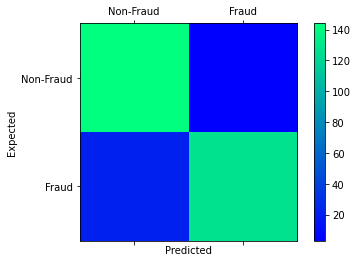

In [64]:
rfc_under = RandomForestClassifier(random_state=1, max_features='auto', n_estimators= 100, max_depth=5, criterion='entropy')
rfc_under.fit(X_under_train, y_under_train)
pred_under = rfc_under.predict(X_under_test)


conf_mat = confusion_matrix(y_true=y_under_test, y_pred=pred_under)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Fraud', 'Fraud']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.winter)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [65]:
print(classification_report(y_under_test,pred_under))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       147
           1       0.98      0.86      0.91       149

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.93      0.92      0.92       296



We have got an F1-score of **0.92** using random under sampling. 

**Note:** Here I used F1-score as performance metric, accuracy is misleading in imbalanced dataset. So, lookout for number of False positives in your model.

I'm not using a GridSearchCV for over sampled data, running gridsearch on oversampled data which contains more than 500000 entries will take a lot of time for execution. So, I'm skipping the gridsearch process for over sampling models.

# Modelling Near Miss Under sampled data

Confusion matrix:
 [[145   2]
 [ 14 135]]


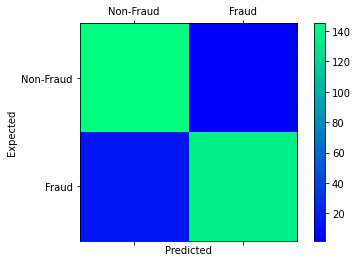

In [66]:
rfc_near_miss = RandomForestClassifier(random_state=1, max_features='auto', n_estimators= 100, max_depth=5, criterion='entropy')
rfc_near_miss.fit(X_near_train, y_near_train)
pred_near_miss = rfc_near_miss.predict(X_near_test)


conf_mat = confusion_matrix(y_true=y_near_test, y_pred=pred_near_miss)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Fraud', 'Fraud']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.winter)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [67]:
print(classification_report(y_near_test,pred_near_miss))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       147
           1       0.99      0.91      0.94       149

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



We have got an F1-score of **0.95** using near miss under sampling.

# Modelling Tomek Links Under sampled data

Confusion matrix:
 [[85254    16]
 [   31   130]]


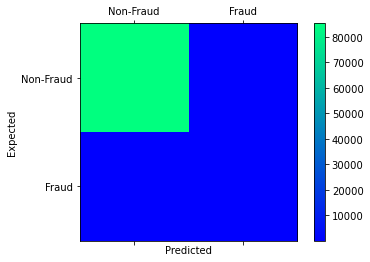

In [68]:
rfc_tomek = RandomForestClassifier(random_state=1, max_features='auto', n_estimators= 100, max_depth=5, criterion='entropy')
rfc_tomek.fit(X_tomek_train, y_tomek_train)
pred_tomek = rfc_tomek.predict(X_tomek_test)


conf_mat = confusion_matrix(y_true=y_tomek_test, y_pred=pred_tomek)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Fraud', 'Fraud']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.winter)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [69]:
print(classification_report(y_tomek_test,pred_tomek))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85270
           1       0.89      0.81      0.85       161

    accuracy                           1.00     85431
   macro avg       0.95      0.90      0.92     85431
weighted avg       1.00      1.00      1.00     85431



We have got an F1-score of **1.00** using Tomek Links under sampling.

# Modelling Cluster Centroid Under sampling data

Confusion matrix:
 [[146   1]
 [ 22 127]]


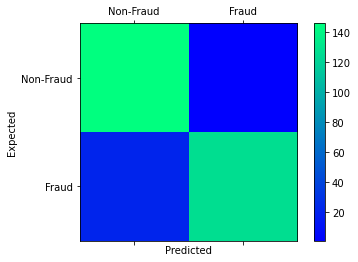

In [70]:
rfc_cluster = RandomForestClassifier(random_state=1, max_features='auto', n_estimators= 100, max_depth=5, criterion='entropy')
rfc_cluster.fit(X_cluster_train, y_cluster_train)
pred_cluster = rfc_cluster.predict(X_cluster_test)


conf_mat = confusion_matrix(y_true=y_cluster_test, y_pred=pred_cluster)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Fraud', 'Fraud']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.winter)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [71]:
print(classification_report(y_cluster_test,pred_cluster))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       147
           1       0.99      0.85      0.92       149

    accuracy                           0.92       296
   macro avg       0.93      0.92      0.92       296
weighted avg       0.93      0.92      0.92       296



We have got an F1-score of **0.92** using Cluster Centroid under sampling.

# Random Forest Model for Random Over Sampling

Confusion matrix:
 [[85023   149]
 [ 4072 81345]]


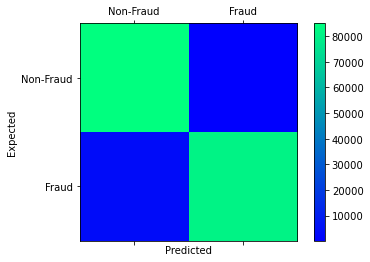

In [72]:
rfc_over = RandomForestClassifier(random_state=1, max_features='log2', n_estimators= 100, max_depth=8, criterion='entropy')
rfc_over.fit(X_over_train, y_over_train)
pred_over = rfc_over.predict(X_over_test)


conf_mat = confusion_matrix(y_true=y_over_test, y_pred=pred_over)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Fraud', 'Fraud']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.winter)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [73]:
print(classification_report(y_over_test,pred_over))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     85172
           1       1.00      0.95      0.97     85417

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589



We have got an F1-score of **0.98** using random over sampling.

# Modelling SMOTE Over sampled data

Confusion matrix:
 [[84150  1022]
 [ 6460 78957]]


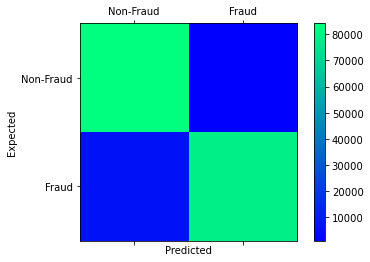

In [74]:
rfc_smote = RandomForestClassifier(random_state=1, max_features='log2', n_estimators= 100, max_depth=8, criterion='entropy')
rfc_smote.fit(X_SMOTE_train, y_SMOTE_train)
pred_smote = rfc_smote.predict(X_SMOTE_test)


conf_mat = confusion_matrix(y_true=y_SMOTE_test, y_pred=pred_smote)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Fraud', 'Fraud']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.winter)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [75]:
print(classification_report(y_SMOTE_test,pred_smote))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     85172
           1       0.99      0.92      0.95     85417

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589



We have got an F1-score of **0.96** using SMOTE over sampling.

# Modelling ADASYN Over sampled data

Confusion matrix:
 [[80844  4370]
 [ 7634 77738]]


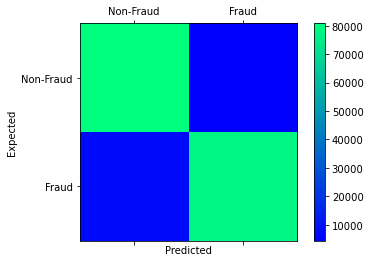

In [76]:
rfc_adasyn = RandomForestClassifier(random_state=1, max_features='log2', n_estimators= 100, max_depth=8, criterion='entropy')
rfc_adasyn.fit(X_adasyn_train, y_adasyn_train)
pred_adasyn = rfc_adasyn.predict(X_adasyn_test)


conf_mat = confusion_matrix(y_true=y_adasyn_test, y_pred=pred_adasyn)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Fraud', 'Fraud']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.winter)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [77]:
print(classification_report(y_adasyn_test,pred_adasyn))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     85214
           1       0.95      0.91      0.93     85372

    accuracy                           0.93    170586
   macro avg       0.93      0.93      0.93    170586
weighted avg       0.93      0.93      0.93    170586



We have got an F1-score of **0.93** using ADASYN over sampling.

# Modelling SMOTE + Tomek Links Combined sample data

Confusion matrix:
 [[84150  1022]
 [ 6460 78957]]


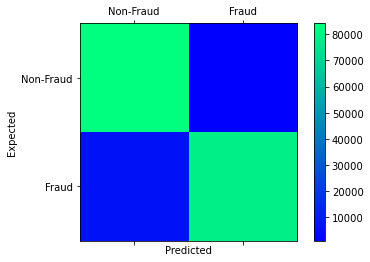

In [83]:
rfc_smotetomek = RandomForestClassifier(random_state=1, max_features='log2', n_estimators= 100, max_depth=8, criterion='entropy')
rfc_smotetomek.fit(X_SMOTETomek_train, y_SMOTETomek_train)
pred_smotetomek = rfc_smotetomek.predict(X_SMOTETomek_test)


conf_mat = confusion_matrix(y_true=y_SMOTETomek_test, y_pred=pred_smotetomek)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Fraud', 'Fraud']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.winter)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [84]:
print(classification_report(y_SMOTETomek_test,pred_smotetomek))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     85172
           1       0.99      0.92      0.95     85417

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589



We have got an F1-score of **0.96** using SMOTE + Tomek Links combined sampling.

# Summary

We have seen different types of resampling techniques used to eliminate bias in imbalanced dataset.

I'm not going to state some sampling technique as the best using the results inferred above (also I have not used Gridsearch for over sampling and combined sampling model).

Each model has it's own advantage on different dataset/distributions.